In [195]:
import pandas as pd
from category_encoders.one_hot import OneHotEncoder
from umap.umap_ import UMAP
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [166]:
train = pd.read_csv('train.csv')
train.head()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216


In [167]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [168]:
train,test = train_test_split(train,random_state=42,test_size=0.2)

In [169]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [170]:
train['Приоритет']=train['Приоритет'].map({'0-Критический':3,'1-Высокий':2,'2-Средний':1,'3-Низкий':0})
train['Статус'] = train['Статус'].map({'Закрыт':1,'Отменен':0})
train['Критичность']=train['Критичность'].map({'4-Нет':0,'3-Базовая':1,'2-Повышенная':2,'1-Особая':3})
train['Влияние'] = train['Влияние'].map({'4-Нет влияния':0,'3-Малое':1,'2-Значительное':2,'1-Всеохватывающее':3})
train['Тип обращения итоговый'] = train['Тип обращения итоговый'].map({'Запрос':0,'Инцидент':1})
train['Тип обращения на момент подачи'] = train['Тип обращения на момент подачи'].map({'Запрос':0,'Инцидент':1})

In [172]:
test['Приоритет']=test['Приоритет'].map({'0-Критический':3,'1-Высокий':2,'2-Средний':1,'3-Низкий':0})
test['Статус'] = test['Статус'].map({'Закрыт':1,'Отменен':0})
test['Критичность']=test['Критичность'].map({'4-Нет':0,'3-Базовая':1,'2-Повышенная':2,'1-Особая':3})
test['Влияние'] = test['Влияние'].map({'4-Нет влияния':0,'3-Малое':1,'2-Значительное':2,'1-Всеохватывающее':3})
test['Тип обращения итоговый'] = test['Тип обращения итоговый'].map({'Запрос':0,'Инцидент':1})
test['Тип обращения на момент подачи'] = test['Тип обращения на момент подачи'].map({'Запрос':0,'Инцидент':1})

In [173]:
# fg = ce.CatBoostEncoder(cols=['Функциональная группа'])
# train['Функциональная группа']=fg.fit_transform(train['Функциональная группа'], train['Тип обращения итоговый'])
# test['Функциональная группа']=fg.fit_transform(test['Функциональная группа'], test['Тип обращения итоговый'])
# serv = ce.CatBoostEncoder(cols=['Сервис'])
# train['Сервис']=serv.fit_transform(train['Сервис'], train['Тип обращения итоговый'])
# test['Сервис']=serv.fit_transform(test['Сервис'], test['Тип обращения итоговый'])
# sys = ce.CatBoostEncoder(cols=['Система'])
# train['Система']=sys.fit_transform(train['Система'], train['Тип обращения итоговый'])
# test['Система']=sys.fit_transform(test['Система'], test['Тип обращения итоговый'])
# plc = ce.CatBoostEncoder(cols=['Место'])
# train['Место']=plc.fit_transform(train['Место'], train['Тип обращения итоговый'])
# test['Место']=plc.fit_transform(test['Место'], test['Тип обращения итоговый'])

In [175]:
# train[train['Дата восстановления'].isna()==True]
for i in range(len(train['Дата восстановления'])):
    if train['Дата восстановления'].isna()[i]==True:
        train['Дата восстановления'][i] = train['Дата закрытия обращения'][i]
        

C:\Users\imars\AppData\Local\Temp\ipykernel_15264\1614655585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Дата восстановления'][i] = train['Дата закрытия обращения'][i]


In [176]:
for i in range(len(test['Дата восстановления'])):
    if test['Дата восстановления'].isna()[i]==True:
        test['Дата восстановления'][i] = test['Дата закрытия обращения'][i]
for i in range(len(test['Дата закрытия обращения'])):
    if test['Дата закрытия обращения'].isna()[i]==True:
        test['Дата закрытия обращения'][i] = test['Крайний срок'][i]    

C:\Users\imars\AppData\Local\Temp\ipykernel_15264\3865489525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Дата восстановления'][i] = test['Дата закрытия обращения'][i]
C:\Users\imars\AppData\Local\Temp\ipykernel_15264\3865489525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Дата закрытия обращения'][i] = test['Крайний срок'][i]


In [177]:
for i in range(len(train['Дата закрытия обращения'])):
    if train['Дата закрытия обращения'].isna()[i]==True:
        train['Дата закрытия обращения'][i] = train['Крайний срок'][i]

C:\Users\imars\AppData\Local\Temp\ipykernel_15264\913383985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Дата закрытия обращения'][i] = train['Крайний срок'][i]


In [178]:
for i in range(len(train['Крайний срок'])):
    train['Крайний срок'][i] = pd.to_datetime(train['Крайний срок'][i]).value // 10**9
for i in range(len(train['Дата обращения'])):
    train['Дата обращения'][i] = pd.to_datetime(train['Дата обращения'][i]).value // 10**9
for i in range(len(train['Дата восстановления'])):
    train['Дата восстановления'][i] = pd.to_datetime(train['Дата восстановления'][i]).value // 10**9
for i in range(len(train['Дата закрытия обращения'])):
    train['Дата закрытия обращения'][i] = pd.to_datetime(train['Дата закрытия обращения'][i]).value // 10**9

C:\Users\imars\AppData\Local\Temp\ipykernel_15264\2137825982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Крайний срок'][i] = pd.to_datetime(train['Крайний срок'][i]).value // 10**9
C:\Users\imars\AppData\Local\Temp\ipykernel_15264\2137825982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Дата обращения'][i] = pd.to_datetime(train['Дата обращения'][i]).value // 10**9
C:\Users\imars\AppData\Local\Temp\ipykernel_15264\2137825982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [179]:
for i in range(len(test['Крайний срок'])):
    test['Крайний срок'][i] = pd.to_datetime(test['Крайний срок'][i]).value // 10**9
for i in range(len(test['Дата обращения'])):
    test['Дата обращения'][i] = pd.to_datetime(test['Дата обращения'][i]).value // 10**9
for i in range(len(test['Дата восстановления'])):
    test['Дата восстановления'][i] = pd.to_datetime(test['Дата восстановления'][i]).value // 10**9
for i in range(len(test['Дата закрытия обращения'])):
    test['Дата закрытия обращения'][i] = pd.to_datetime(test['Дата закрытия обращения'][i]).value // 10**9

C:\Users\imars\AppData\Local\Temp\ipykernel_15264\2256294514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Крайний срок'][i] = pd.to_datetime(test['Крайний срок'][i]).value // 10**9
C:\Users\imars\AppData\Local\Temp\ipykernel_15264\2256294514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Дата обращения'][i] = pd.to_datetime(test['Дата обращения'][i]).value // 10**9
C:\Users\imars\AppData\Local\Temp\ipykernel_15264\2256294514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
# drp = ['Сервис','Функциональная группа','Система','Место']
# train.drop(drp,axis=1,inplace=True)
# test.drop(drp,axis=1,inplace=True)

In [180]:
train.head()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Настройка ЭП в Сервис22,0.02736,0,1,0.02736,1517569260,1517132760,0,0,Права предоставлены,0,1517142240,1517751540,2,0,0.02736,0.02736
1,заявка на предоставление логического доступа к...,0.02736,1,1,0.01368,1518769920,1518333420,0,0,Заявка исполнена,0,1518596340,1519206000,3,0,0.02736,0.02736
2,Заявка на предоставление и отзыв прав доступа ...,0.02736,1,1,0.00912,1518937080,1518764280,0,0,Работы по обращению выполнены,0,1518772980,1519382400,3,0,0.02736,0.02736
3,Отключение учётной записи,0.02736,1,1,0.02736,1518266520,1518007320,0,0,Выполнено штатное отключение учетной записи **...,0,1518007980,1518617280,3,0,0.02736,0.02736
4,"""Письмо Random92081"" - ЗАЯВКА на предоставлени...",0.02736,0,1,0.00684,1518867360,1518608160,0,0,Работы по обращению выполнены.,0,1518694920,1519304340,0,1,0.02736,0.02736


In [181]:
train.drop(train[train['Содержание'].isna()==True].index,inplace=True)
train.reset_index(drop=True,inplace=True)
test.drop(train[train['Содержание'].isna()==True].index,inplace=True)
test.reset_index(drop=True,inplace=True)

In [182]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    # Очистка данных
    text = re.sub(r"[^а-яА-ЯёЁa-zA-Z0-9]", " ", text)
    text = re.sub(r"\s+", " ", text)

    # Токенизация
    tokens = word_tokenize(text.lower(), language='russian')

    # Удаление стоп-слов
    stop_words = set(stopwords.words("russian"))
    tokens = [word for word in tokens if word not in stop_words]

    # Лемматизация
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Пример использования
train['Содержание'] = train['Содержание'].apply(preprocess_text)
train['Решение             '] = train['Решение             '].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [183]:
test['Содержание'] = test['Содержание'].apply(preprocess_text)
test['Решение             '] = test['Решение             '].apply(preprocess_text)

In [184]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,настройка эп сервис22,0.027360,0,1,0.027360,1517569260,1517132760,0,0,права предоставлены,0,1517142240,1517751540,2,0,0.027360,0.027360
1,заявка предоставление логического доступа сист...,0.027360,1,1,0.013680,1518769920,1518333420,0,0,заявка исполнена,0,1518596340,1519206000,3,0,0.027360,0.027360
2,заявка предоставление отзыв прав доступа ресурсам,0.027360,1,1,0.009120,1518937080,1518764280,0,0,работы обращению выполнены,0,1518772980,1519382400,3,0,0.027360,0.027360
3,отключение учётной записи,0.027360,1,1,0.027360,1518266520,1518007320,0,0,выполнено штатное отключение учетной записи,0,1518007980,1518617280,3,0,0.027360,0.027360
4,письмо random92081 заявка предоставление прав ...,0.027360,0,1,0.006840,1518867360,1518608160,0,0,работы обращению выполнены,0,1518694920,1519304340,0,1,0.027360,0.027360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836,система20,0.075860,0,1,0.027360,1518363360,1517510880,0,0,перенесено бз,0,1518345660,1518955080,2,1,0.031535,0.004193
11837,работает интернет,0.025058,0,1,0.000314,1519227360,1518677820,1,0,интернет пк,2,1519215540,1519215900,0,1,0.025058,0.005296
11838,создание новой учетной записи,0.010203,0,1,0.009120,1517989860,1517545800,0,0,исполнено,0,1517547420,1518166560,0,1,0.009680,0.000829
11839,настроить работу уз,0.010199,0,1,0.046056,1517471460,1516983120,0,0,выполнено,0,1517056020,1517665560,0,1,0.009677,0.000570


In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
content_transformed = vectorizer.fit_transform(train['Содержание'].dropna())
content = pd.DataFrame.sparse.from_spmatrix(content_transformed)
clms = [str(i) for i in range(1679)]
content.columns=clms
result_t = vectorizer.transform(train['Решение             '])
result = pd.DataFrame.sparse.from_spmatrix(result_t)
clms = [str(i) for i in range(1679,3358)]
result.columns=clms
result

,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,...,3348,3349,3350,3351,3352,3353,3354,3355,3356,3357
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
content_transformed = vectorizer.fit_transform(train['Содержание'].dropna())
content = pd.DataFrame.sparse.from_spmatrix(content_transformed)
content_transformed = vectorizer.transform(test['Содержание'].dropna())
content_test = pd.DataFrame.sparse.from_spmatrix(content_transformed)
clms = [str(i) for i in range(1679)]
content.columns=clms
content_test.columns=clms
result_t = vectorizer.fit_transform(train['Решение             '])
result = pd.DataFrame.sparse.from_spmatrix(result_t)
result_t = vectorizer.transform(test['Решение             '])
result_test = pd.DataFrame.sparse.from_spmatrix(result_t)
clms = [str(i) for i in range(1679,4078)]
result.columns=clms
result_test.columns=clms
result

,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,...,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
result = pd.concat([pd.DataFrame(content),pd.DataFrame(result)],axis=True)
result_test = pd.concat([pd.DataFrame(content_test),pd.DataFrame(result_test)],axis=True)

In [188]:
ds = pd.concat([result,train],axis=1)
ds
ds_test = pd.concat([result_test,test],axis=1)
ds_test

,0,1,2,3,4,5,6,7,8,9,...,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,заявка загружена система22,0,1517974320,1517976240,2,0,0.027356,0.027356
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,учетная запись разблокирована,0,1517040060,1517648700,3,0,0.027356,0.027356
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,работы обращению выполнены,0,1518276720,1518315120,2,0,0.027356,0.027356
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,запрос отменён пользователем портала самообслу...,0,1517662800,1518099300,0,0,0.027356,0.027356
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,блокировка загрузки документов данный момент ф...,0,1517493000,1518162840,3,2,0.027356,0.027356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,права предоставлены,0,1518009240,1518618780,2,0,0.023972,0.013678
2957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,выполнено,0,1517989860,1518018960,0,0,0.006421,0.216401
2958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,работы обращению выполнены,0,1518920520,1518921300,0,0,0.002835,0.041375
2959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,изменение атрибута телефон уз выполнено,0,1517044140,1517133840,3,0,0.003293,0.002736


In [189]:
ds.drop('Содержание',axis=1,inplace=True)
ds.drop('Решение             ',axis=1,inplace=True)
ds_test.drop('Содержание',axis=1,inplace=True)
ds_test.drop('Решение             ',axis=1,inplace=True)

In [190]:
ds.drop('Тип переклассификации', axis=1,inplace=True)
ds_test.drop('Тип переклассификации', axis=1,inplace=True)

In [192]:
X_train = ds.drop('Тип обращения итоговый',axis=1)
ytrain = ds['Тип обращения итоговый']

In [194]:
X_test = ds_test.drop('Тип обращения итоговый',axis=1)
ytest = ds_test['Тип обращения итоговый']

In [196]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

c:\Users\imars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\imars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\imars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\imars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py:185: FutureWarning: The behavior of .astype fro

<AxesSubplot: >

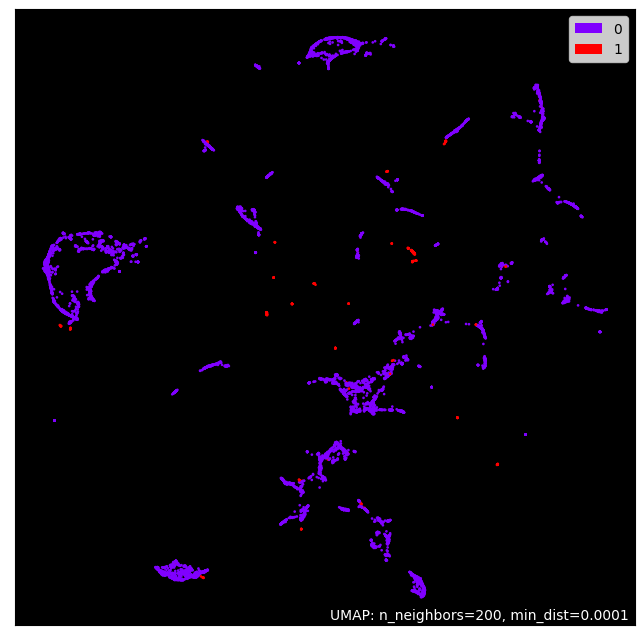

In [26]:
import umap.plot
manifold = UMAP(min_dist=0.0001,n_neighbors=200).fit(X, y)
umap.plot.points(manifold, labels=y, theme="fire")

In [278]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=42, test_size=0.2,stratify=y)

In [197]:
clf = CatBoostClassifier()
clf.fit(X_train,ytrain)

Learning rate set to 0.029599
0:	learn: 0.6355866	total: 53.8ms	remaining: 53.8s
1:	learn: 0.5787317	total: 113ms	remaining: 56.5s
2:	learn: 0.5297780	total: 175ms	remaining: 58.1s
3:	learn: 0.4851835	total: 239ms	remaining: 59.6s
4:	learn: 0.4385358	total: 300ms	remaining: 59.8s
5:	learn: 0.4013830	total: 373ms	remaining: 1m 1s
6:	learn: 0.3683992	total: 435ms	remaining: 1m 1s
7:	learn: 0.3379360	total: 502ms	remaining: 1m 2s
8:	learn: 0.3095269	total: 569ms	remaining: 1m 2s
9:	learn: 0.2828135	total: 638ms	remaining: 1m 3s
10:	learn: 0.2570335	total: 706ms	remaining: 1m 3s
11:	learn: 0.2346167	total: 771ms	remaining: 1m 3s
12:	learn: 0.2165751	total: 832ms	remaining: 1m 3s
13:	learn: 0.1991275	total: 888ms	remaining: 1m 2s
14:	learn: 0.1863286	total: 951ms	remaining: 1m 2s
15:	learn: 0.1720782	total: 1.01s	remaining: 1m 2s
16:	learn: 0.1595788	total: 1.07s	remaining: 1m 2s
17:	learn: 0.1476997	total: 1.14s	remaining: 1m 1s
18:	learn: 0.1396729	total: 1.19s	remaining: 1m 1s
19:	learn:

In [199]:
pred = clf.predict(X_test)

In [200]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(confusion_matrix(ytest,pred))
print(f1_score(ytest,pred,average='macro'))

[[2871    9]
 [  19   62]]
0.9054683936878591


In [41]:
test = pd.read_csv('test.csv')
test.head()

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25


In [43]:
test['Приоритет']=test['Приоритет'].map({'0-Критический':3,'1-Высокий':2,'2-Средний':1,'3-Низкий':0})

In [44]:
test['Приоритет'].value_counts()

0    4535
1    1805
2       4
Name: Приоритет, dtype: int64